In [46]:
import pandas as pd
import urllib as ul
import numpy as np
from Bio import Entrez
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('SFARI-Gene_genes_11-07-2022release_11-10-2022export.csv', header=0, sep=',')

In [3]:
data

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,eagle,number-of-reports
0,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,6
1,9,ABCA10,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000154263,17,Rare Single Gene Mutation,2.0,0,NaN,1
2,9,ABCA13,ATP binding cassette subfamily A member 13,ENSG00000179869,7,"Rare Single Gene Mutation, Functional",2.0,0,NaN,9
3,9,ABCA7,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000064687,19,Rare Single Gene Mutation,2.0,0,NaN,4
4,9,ABL2,"ABL proto-oncogene 2, non-receptor tyrosine ki...",ENSG00000143322,1,"Rare Single Gene Mutation, Functional",3.0,0,NaN,10
...,...,...,...,...,...,...,...,...,...,...
1090,9,ZNF774,Zinc finger protein 774,ENSG00000196391,15,Rare Single Gene Mutation,2.0,0,NaN,3
1091,9,ZNF804A,Zinc finger protein 804A,ENSG00000170396,2,"Rare Single Gene Mutation, Genetic Association...",2.0,0,NaN,15
1092,9,ZNF827,Zinc finger protein 827,ENSG00000151612,4,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,2
1093,9,ZSWIM6,zinc finger SWIM-type containing 6,ENSG00000130449,5,"Rare Single Gene Mutation, Syndromic, Genetic ...",NaN,1,NaN,5


In [4]:
data_gs_withNA = pd.DataFrame(data.value_counts(['gene-score'], dropna=False),columns=['gene_number'])
data_gs_withNA

,gene_number
gene-score,
2.0,695
1.0,214
NaN,95
3.0,91


In [10]:
dd = pd.DataFrame(data.value_counts(['gene-score']),columns=['gene_number'])
dd.index = [i[0] for i in dd.index]
dd

,gene_number
2.0,695
1.0,214
3.0,91


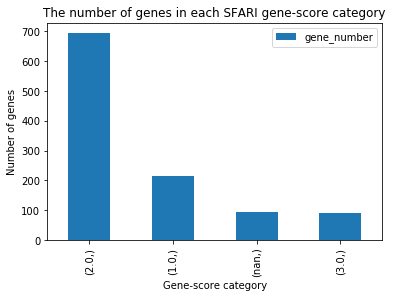

In [13]:
data_gs_withNA.plot.bar(xlabel='Gene-score category',
    ylabel='Number of genes',
    title='The number of genes in each SFARI gene-score category',
    stacked=True).legend(loc='best');

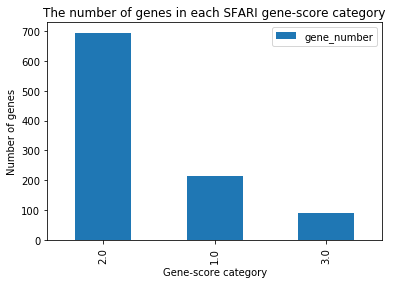

In [14]:
dd.plot.bar(xlabel='Gene-score category',
    ylabel='Number of genes',
    title='The number of genes in each SFARI gene-score category',
    stacked=True).legend(loc='best');

In [28]:
p1t2 = data.sort_values(by=['number-of-reports'], ascending=False)
p1t2.head(5)

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,eagle,number-of-reports
870,9,SHANK3,SH3 and multiple ankyrin repeat domains 3,ENSG00000251322,22,"Rare Single Gene Mutation, Syndromic, Genetic ...",1.0,1,74.85,120
563,9,MECP2,Methyl CpG binding protein 2,ENSG00000169057,X,"Rare Single Gene Mutation, Syndromic, Functional",1.0,1,NaN,107
644,9,NRXN1,neurexin 1,ENSG00000179915,2,"Rare Single Gene Mutation, Syndromic, Genetic ...",1.0,0,143.75,100
846,9,SCN2A,"sodium channel, voltage-gated, type II, alpha ...",ENSG00000136531,2,"Rare Single Gene Mutation, Syndromic, Functional",1.0,0,109.30,96
845,9,SCN1A,"sodium channel, voltage-gated, type I, alpha s...",ENSG00000144285,2,"Rare Single Gene Mutation, Syndromic, Genetic ...",1.0,1,NaN,84


**Part 1, task 3**

In [31]:
#search 1, SHANK3 AND Autism
handle = Entrez.egquery(term='SHANK3 AND Autism')
record = Entrez.read(handle)
handle.close()

for row in record["eGQueryResult"]:
    if row["DbName"]=="pubmed":
        print('SHANK3 AND Autism')
        print(row["Count"]+' papers\n')

SHANK3 AND Autism
493 papers



In [32]:
#search 2, MECP2 AND Autism
handle = Entrez.egquery(term='MECP2 AND Autism')
record = Entrez.read(handle)
handle.close()

for row in record["eGQueryResult"]:
    if row["DbName"]=="pubmed":
        print('MECP2 AND Autism')
        print(row["Count"]+' papers\n')

        
#search 3, NRXN1 AND Autism
handle = Entrez.egquery(term='NRXN1 AND Autism')
record = Entrez.read(handle)
handle.close()

for row in record["eGQueryResult"]:
    if row["DbName"]=="pubmed":
        print('NRXN1 AND Autism')
        print(row["Count"]+' papers\n')       

        
#search 4, SCN2A AND Autism
handle = Entrez.egquery(term='SCN2A AND Autism')
record = Entrez.read(handle)
handle.close()

for row in record["eGQueryResult"]:
    if row["DbName"]=="pubmed":
        print('SCN2A AND Autism')
        print(row["Count"]+' papers\n')

                
#search 5, SCN1A AND Autism
handle = Entrez.egquery(term='SCN1A AND Autism')
record = Entrez.read(handle)
handle.close()

for row in record["eGQueryResult"]:
    if row["DbName"]=="pubmed":
        print('SCN1A AND Autism')
        print(row["Count"]+' papers\n')

MECP2 AND Autism
524 papers

NRXN1 AND Autism
184 papers

SCN2A AND Autism
103 papers

SCN1A AND Autism
80 papers



In [33]:
#search 1, SHANK3 AND Autism
handle = Entrez.egquery(term='SHANK3 AND "Autism Spectrum Disorder"[MH]')
record = Entrez.read(handle)
handle.close()

for row in record["eGQueryResult"]:
    if row["DbName"]=="pubmed":
        print('SHANK3 AND Autism')
        print(row["Count"]+' papers\n')

SHANK3 AND Autism
253 papers



In [36]:
search = '"Autism Spectrum Disorder"[MH]'

#search 1, SHANK3 AND Autism
handle = Entrez.egquery(term='SHANK3 AND ' + search)
record = Entrez.read(handle)
handle.close()

for row in record["eGQueryResult"]:
    if row["DbName"]=="pubmed":
        print('SHANK3 AND "Autism Spectrum Disorder"[MH]')
        print(row["Count"]+' papers\n')
        
#search 2, MECP2 AND Autism
handle = Entrez.egquery(term='MECP2 AND ' + search)
record = Entrez.read(handle)
handle.close()

for row in record["eGQueryResult"]:
    if row["DbName"]=="pubmed":
        print('MECP2 AND "Autism Spectrum Disorder"[MH]')
        print(row["Count"]+' papers\n')

        
#search 3, NRXN1 AND Autism
handle = Entrez.egquery(term='NRXN1 AND ' + search)
record = Entrez.read(handle)
handle.close()

for row in record["eGQueryResult"]:
    if row["DbName"]=="pubmed":
        print('NRXN1 AND "Autism Spectrum Disorder"[MH]')
        print(row["Count"]+' papers\n')       

        
#search 4, SCN2A AND Autism
handle = Entrez.egquery(term='SCN2A AND ' + search)
record = Entrez.read(handle)
handle.close()

for row in record["eGQueryResult"]:
    if row["DbName"]=="pubmed":
        print('SCN2A AND "Autism Spectrum Disorder"[MH]')
        print(row["Count"]+' papers\n')

                
#search 5, SCN1A AND Autism
handle = Entrez.egquery(term='SCN1A AND ' + search)
record = Entrez.read(handle)
handle.close()

for row in record["eGQueryResult"]:
    if row["DbName"]=="pubmed":
        print('SCN1A AND "Autism Spectrum Disorder"[MH]')
        print(row["Count"]+' papers\n')

SHANK3 AND "Autism Spectrum Disorder"[MH]
253 papers

MECP2 AND "Autism Spectrum Disorder"[MH]
151 papers

NRXN1 AND "Autism Spectrum Disorder"[MH]
84 papers

SCN2A AND "Autism Spectrum Disorder"[MH]
57 papers

SCN1A AND "Autism Spectrum Disorder"[MH]
29 papers



**Part 1 task 4**

In [63]:
genes = ['SHANK3', 'MECP2', 'NRXN1', 'SCN2A', 'SCN1A']
search1 = 'Autism'
search2 = '"Autism Spectrum Disorder"[MH]'
table = np.zeros((5, 30))
years = list(range(1993,2023))

for i in range(30):
    for j in range(5):
        string = str(years[i]) + '[dp] AND ' + genes[j] + ' AND ' + search1
        handle = Entrez.egquery(term=string)
        record = Entrez.read(handle)
        handle.close()
        # we can iterate through the record and only return the 'nucleotide' result
        for row in record["eGQueryResult"]:
            if row["DbName"]=="pubmed":
                table[j][i] = int(row["Count"])

In [64]:
table

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,
         1.,  4.,  9.,  9.,  9., 21., 21., 32., 34., 31., 48., 44., 57.,
        56., 57., 67., 70.],
       [ 3.,  0.,  0.,  0.,  0.,  0.,  1.,  7.,  4.,  9.,  8., 11., 17.,
        13., 20., 20., 26., 23., 38., 30., 37., 42., 50., 48., 41., 26.,
        38., 31., 21., 26.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  4.,  7., 14., 10., 21., 17., 20., 18., 17.,  8., 15., 13.,
        22., 12., 13., 12.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  0.,
         0.,  0.,  2.,  0.,  1.,  1.,  1.,  3.,  6.,  7.,  8.,  8., 11.,
        18., 12., 22., 15.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  1.,
         0.,  0.,  1.,  1.,  0.,  3.,  7.,  4.,  3.,  5.,  5.,  6.,  6.,
         9., 13., 12.,  9.]])

In [65]:
genes = ['SHANK3', 'MECP2', 'NRXN1', 'SCN2A', 'SCN1A']
search1 = 'Autism'
search2 = '"Autism Spectrum Disorder"[MH]'
table2 = np.zeros((5, 30))
years = list(range(1993,2023))

for i in range(30):
    for j in range(5):
        string = str(years[i]) + '[dp] AND ' + genes[j] + ' AND ' + search2
        handle = Entrez.egquery(term=string)
        record = Entrez.read(handle)
        handle.close()
        # we can iterate through the record and only return the 'nucleotide' result
        for row in record["eGQueryResult"]:
            if row["DbName"]=="pubmed":
                table2[j][i] = int(row["Count"])

In [66]:
table2

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         1.,  4.,  6.,  8.,  4., 10.,  7.,  6.,  4., 16., 30., 24., 23.,
        36., 36., 37., 41.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  2.,  5.,  4.,  7.,
         2.,  7.,  9., 11.,  8.,  7.,  7.,  5.,  7., 11., 20., 15.,  7.,
        11., 13.,  8., 11.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  4.,  5.,  9.,  3.,  2.,  6.,  9.,  7.,  5.,  3.,  7.,  7.,
        13.,  6.,  9.,  8.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  0.,
         0.,  0.,  2.,  0.,  1.,  0.,  1.,  2.,  1.,  4.,  6.,  5.,  4.,
         9.,  7., 11.,  9.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  1.,
         0.,  0.,  1.,  1.,  0.,  0.,  2.,  1.,  0.,  1.,  3.,  0.,  2.,
         1.,  7.,  5.,  3.]])

In [60]:
years = list(range(1993,2023))
for i in range(30):
    for gene in genes:
        string = str(years[i]) + '[dp] AND ' + gene + ' AND ' + search1
        print(string)

1993[dp] AND SHANK3 AND Autism
1993[dp] AND MECP2 AND Autism
1993[dp] AND NRXN1 AND Autism
1993[dp] AND SCN2A AND Autism
1993[dp] AND SCN1A AND Autism
1994[dp] AND SHANK3 AND Autism
1994[dp] AND MECP2 AND Autism
1994[dp] AND NRXN1 AND Autism
1994[dp] AND SCN2A AND Autism
1994[dp] AND SCN1A AND Autism
1995[dp] AND SHANK3 AND Autism
1995[dp] AND MECP2 AND Autism
1995[dp] AND NRXN1 AND Autism
1995[dp] AND SCN2A AND Autism
1995[dp] AND SCN1A AND Autism
1996[dp] AND SHANK3 AND Autism
1996[dp] AND MECP2 AND Autism
1996[dp] AND NRXN1 AND Autism
1996[dp] AND SCN2A AND Autism
1996[dp] AND SCN1A AND Autism
1997[dp] AND SHANK3 AND Autism
1997[dp] AND MECP2 AND Autism
1997[dp] AND NRXN1 AND Autism
1997[dp] AND SCN2A AND Autism
1997[dp] AND SCN1A AND Autism
1998[dp] AND SHANK3 AND Autism
1998[dp] AND MECP2 AND Autism
1998[dp] AND NRXN1 AND Autism
1998[dp] AND SCN2A AND Autism
1998[dp] AND SCN1A AND Autism
1999[dp] AND SHANK3 AND Autism
1999[dp] AND MECP2 AND Autism
1999[dp] AND NRXN1 AND Autism
199

In [57]:
years = list(range(1993,2023))
years

[1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021,
 2022]

In [45]:
table[0][1] = 1

In [68]:
table_df = pd.DataFrame(table)
table_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,32.0,34.0,31.0,48.0,44.0,57.0,56.0,57.0,67.0,70.0
1,3.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,4.0,9.0,...,37.0,42.0,50.0,48.0,41.0,26.0,38.0,31.0,21.0,26.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,18.0,17.0,8.0,15.0,13.0,22.0,12.0,13.0,12.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,6.0,7.0,8.0,8.0,11.0,18.0,12.0,22.0,15.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,5.0,5.0,6.0,6.0,9.0,13.0,12.0,9.0


In [69]:
table2_df = pd.DataFrame(table2)
table2_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,4.0,16.0,30.0,24.0,23.0,36.0,36.0,37.0,41.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0,...,5.0,7.0,11.0,20.0,15.0,7.0,11.0,13.0,8.0,11.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,7.0,5.0,3.0,7.0,7.0,13.0,6.0,9.0,8.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,4.0,6.0,5.0,4.0,9.0,7.0,11.0,9.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,3.0,0.0,2.0,1.0,7.0,5.0,3.0


In [71]:
table_df.to_csv('table.csv', sep='\t', index=False)

In [72]:
table2_df.to_csv('table2.csv', sep='\t', index=False)

**Part 1 task 5**

In [6]:
table = pd.read_csv('table.csv', sep='\t')

In [10]:
table.columns = list(range(1993, 2023, 1))

In [35]:
table.index = ['SHANK3', 'MECP2', 'NRXN1', 'SCN2A', 'SCN1A']
table

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
SHANK3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,32.0,34.0,31.0,48.0,44.0,57.0,56.0,57.0,67.0,70.0
MECP2,3.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,4.0,9.0,...,37.0,42.0,50.0,48.0,41.0,26.0,38.0,31.0,21.0,26.0
NRXN1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,18.0,17.0,8.0,15.0,13.0,22.0,12.0,13.0,12.0
SCN2A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,6.0,7.0,8.0,8.0,11.0,18.0,12.0,22.0,15.0
SCN1A,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,5.0,5.0,6.0,6.0,9.0,13.0,12.0,9.0


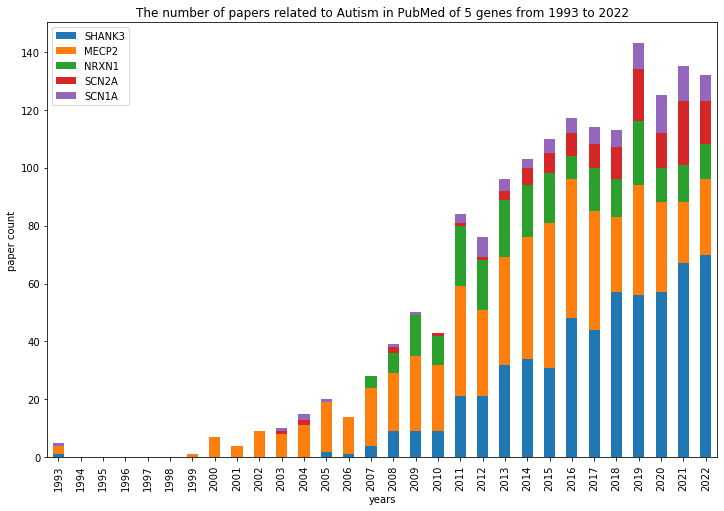

In [81]:
sum_years = table.sum()
table.T.plot.bar(stacked=True, xlabel='years', ylabel='paper count',
        title='The number of papers related to Autism in PubMed of 5 genes from 1993 to 2022', figsize=(12,8))

plt.show()

**Part 2, task 1**

MSNP1AS 4479

In [82]:
data = pd.read_csv('SFARI-Gene_genes_11-07-2022release_11-10-2022export.csv', header=0, sep=',')

In [83]:
data

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,eagle,number-of-reports
0,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,6
1,9,ABCA10,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000154263,17,Rare Single Gene Mutation,2.0,0,NaN,1
2,9,ABCA13,ATP binding cassette subfamily A member 13,ENSG00000179869,7,"Rare Single Gene Mutation, Functional",2.0,0,NaN,9
3,9,ABCA7,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000064687,19,Rare Single Gene Mutation,2.0,0,NaN,4
4,9,ABL2,"ABL proto-oncogene 2, non-receptor tyrosine ki...",ENSG00000143322,1,"Rare Single Gene Mutation, Functional",3.0,0,NaN,10
...,...,...,...,...,...,...,...,...,...,...
1090,9,ZNF774,Zinc finger protein 774,ENSG00000196391,15,Rare Single Gene Mutation,2.0,0,NaN,3
1091,9,ZNF804A,Zinc finger protein 804A,ENSG00000170396,2,"Rare Single Gene Mutation, Genetic Association...",2.0,0,NaN,15
1092,9,ZNF827,Zinc finger protein 827,ENSG00000151612,4,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,2
1093,9,ZSWIM6,zinc finger SWIM-type containing 6,ENSG00000130449,5,"Rare Single Gene Mutation, Syndromic, Genetic ...",NaN,1,NaN,5


In [87]:
# ul.request.urlretrieve('https://ftp.ncbi.nlm.nih.gov/gene/DATA/GENE_INFO/Mammalia/Homo_sapiens.gene_info.gz','Homo_sapiens.gene_info.gz')

('Homo_sapiens.gene_info.gz', <http.client.HTTPMessage at 0x7f6feac019a0>)

In [88]:
human_df = pd.read_csv('Homo_sapiens.gene_info.gz', compression='gzip', header=0, sep='\t')

In [90]:
for gene_symbol in list(data['gene-symbol']):
    gene_id = human_df[human_df['Symbol'] == 'A2M']['GeneID']
    print()

['ABAT',
 'ABCA10',
 'ABCA13',
 'ABCA7',
 'ABL2',
 'ACE',
 'ACHE',
 'ACTB',
 'ACTL6B',
 'ACTN4',
 'ACY1',
 'ADA',
 'ADCY3',
 'ADCY5',
 'ADGRL1',
 'ADK',
 'ADNP',
 'ADORA3',
 'ADSL',
 'ADSS2',
 'AFF2',
 'AGAP1',
 'AGAP2',
 'AGAP5',
 'AGBL4',
 'AGMO',
 'AGO1',
 'AGO2',
 'AGO3',
 'AGO4',
 'AGTR2',
 'AHDC1',
 'AHI1',
 'AHNAK',
 'AKAP9',
 'ALDH1A3',
 'ALDH1L1',
 'ALDH5A1',
 'ALG6',
 'AMPD1',
 'AMT',
 'ANK2',
 'ANK3',
 'ANKRD11',
 'ANKRD17',
 'ANKS1B',
 'ANXA1',
 'AP1S2',
 'AP2S1',
 'APBA2',
 'APBB1',
 'APH1A',
 'ARHGAP11B',
 'ARHGAP32',
 'ARHGAP5',
 'ARHGEF10',
 'ARHGEF2',
 'ARHGEF9',
 'ARID1B',
 'ARID2',
 'ARNT2',
 'ARX',
 'ASAP2',
 'ASB14',
 'ASH1L',
 'ASMT',
 'ASPM',
 'ASTN2',
 'ASXL3',
 'ADORA2A',
 'ADRB2',
 'AR',
 'ATP10A',
 'ATP1A1',
 'ATP1A3',
 'ATP2B1',
 'ATP2B2',
 'ATP6V0A2',
 'ATRX',
 'AUTS2',
 'AVPR1A',
 'AZGP1',
 'BACE1',
 'BAIAP2L1',
 'BAZ2B',
 'BBS4',
 'BCAS1',
 'BCKDK',
 'BCL11A',
 'BCORL1',
 'BICRA',
 'BIRC6',
 'BRAF',
 'BRCA2',
 'BRD4',
 'BRINP3',
 'BRSK2',
 'BRWD3',
 'BST1

In [92]:
human_df.head()

,#tax_id,GeneID,Symbol,LocusTag,Synonyms,dbXrefs,chromosome,map_location,description,type_of_gene,Symbol_from_nomenclature_authority,Full_name_from_nomenclature_authority,Nomenclature_status,Other_designations,Modification_date,Feature_type
0,9606,1,A1BG,-,A1B|ABG|GAB|HYST2477,MIM:138670|HGNC:HGNC:5|Ensembl:ENSG00000121410...,19,19q13.43,alpha-1-B glycoprotein,protein-coding,A1BG,alpha-1-B glycoprotein,O,alpha-1B-glycoprotein|HEL-S-163pA|epididymis s...,20220805,-
1,9606,2,A2M,-,A2MD|CPAMD5|FWP007|S863-7,MIM:103950|HGNC:HGNC:7|Ensembl:ENSG00000175899...,12,12p13.31,alpha-2-macroglobulin,protein-coding,A2M,alpha-2-macroglobulin,O,alpha-2-macroglobulin|C3 and PZP-like alpha-2-...,20221106,-
2,9606,3,A2MP1,-,A2MP,HGNC:HGNC:8|Ensembl:ENSG00000291190|AllianceGe...,12,12p13.31,alpha-2-macroglobulin pseudogene 1,pseudo,A2MP1,alpha-2-macroglobulin pseudogene 1,O,pregnancy-zone protein pseudogene,20221025,-
3,9606,9,NAT1,-,AAC1|MNAT|NAT-1|NATI,MIM:108345|HGNC:HGNC:7645|Ensembl:ENSG00000171...,8,8p22,N-acetyltransferase 1,protein-coding,NAT1,N-acetyltransferase 1,O,arylamine N-acetyltransferase 1|N-acetyltransf...,20220925,-
4,9606,10,NAT2,-,AAC2|NAT-2|PNAT,MIM:612182|HGNC:HGNC:7646|Ensembl:ENSG00000156...,8,8p22,N-acetyltransferase 2,protein-coding,NAT2,N-acetyltransferase 2,O,arylamine N-acetyltransferase 2|N-acetyltransf...,20221009,-


In [91]:
merge_data = data.merge(human_df, left_on=['gene-symbol'], right_on=['Symbol'])
merge_data.head()

,status,gene-symbol,gene-name,ensembl-id,chromosome_x,genetic-category,gene-score,syndromic,eagle,number-of-reports,...,chromosome_y,map_location,description,type_of_gene,Symbol_from_nomenclature_authority,Full_name_from_nomenclature_authority,Nomenclature_status,Other_designations,Modification_date,Feature_type
0,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,6,...,16,16p13.2,4-aminobutyrate aminotransferase,protein-coding,ABAT,4-aminobutyrate aminotransferase,O,"4-aminobutyrate aminotransferase, mitochondria...",20221106,-
1,9,ABCA10,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000154263,17,Rare Single Gene Mutation,2.0,0,NaN,1,...,17,17q24.3,ATP binding cassette subfamily A member 10,protein-coding,ABCA10,ATP binding cassette subfamily A member 10,O,ATP-binding cassette sub-family A member 10|AT...,20221106,-
2,9,ABCA13,ATP binding cassette subfamily A member 13,ENSG00000179869,7,"Rare Single Gene Mutation, Functional",2.0,0,NaN,9,...,7,7p12.3,ATP binding cassette subfamily A member 13,protein-coding,ABCA13,ATP binding cassette subfamily A member 13,O,ATP-binding cassette sub-family A member 13|AT...,20220922,-
3,9,ABCA7,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000064687,19,Rare Single Gene Mutation,2.0,0,NaN,4,...,19,19p13.3,ATP binding cassette subfamily A member 7,protein-coding,ABCA7,ATP binding cassette subfamily A member 7,O,phospholipid-transporting ATPase ABCA7|ATP-bin...,20220922,-
4,9,ABL2,"ABL proto-oncogene 2, non-receptor tyrosine ki...",ENSG00000143322,1,"Rare Single Gene Mutation, Functional",3.0,0,NaN,10,...,1,1q25.2,"ABL proto-oncogene 2, non-receptor tyrosine ki...",protein-coding,ABL2,"ABL proto-oncogene 2, non-receptor tyrosine ki...",O,tyrosine-protein kinase ABL2|Abelson tyrosine-...,20221106,-


In [106]:
# merge_data[['gene-symbol','GeneID']].to_csv('part2_task1.csv', sep='\t', index=False)

In [111]:
merge_data

,status,gene-symbol,gene-name,ensembl-id,chromosome_x,genetic-category,gene-score,syndromic,eagle,number-of-reports,...,chromosome_y,map_location,description,type_of_gene,Symbol_from_nomenclature_authority,Full_name_from_nomenclature_authority,Nomenclature_status,Other_designations,Modification_date,Feature_type
0,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,6,...,16,16p13.2,4-aminobutyrate aminotransferase,protein-coding,ABAT,4-aminobutyrate aminotransferase,O,"4-aminobutyrate aminotransferase, mitochondria...",20221106,-
1,9,ABCA10,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000154263,17,Rare Single Gene Mutation,2.0,0,NaN,1,...,17,17q24.3,ATP binding cassette subfamily A member 10,protein-coding,ABCA10,ATP binding cassette subfamily A member 10,O,ATP-binding cassette sub-family A member 10|AT...,20221106,-
2,9,ABCA13,ATP binding cassette subfamily A member 13,ENSG00000179869,7,"Rare Single Gene Mutation, Functional",2.0,0,NaN,9,...,7,7p12.3,ATP binding cassette subfamily A member 13,protein-coding,ABCA13,ATP binding cassette subfamily A member 13,O,ATP-binding cassette sub-family A member 13|AT...,20220922,-
3,9,ABCA7,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000064687,19,Rare Single Gene Mutation,2.0,0,NaN,4,...,19,19p13.3,ATP binding cassette subfamily A member 7,protein-coding,ABCA7,ATP binding cassette subfamily A member 7,O,phospholipid-transporting ATPase ABCA7|ATP-bin...,20220922,-
4,9,ABL2,"ABL proto-oncogene 2, non-receptor tyrosine ki...",ENSG00000143322,1,"Rare Single Gene Mutation, Functional",3.0,0,NaN,10,...,1,1q25.2,"ABL proto-oncogene 2, non-receptor tyrosine ki...",protein-coding,ABL2,"ABL proto-oncogene 2, non-receptor tyrosine ki...",O,tyrosine-protein kinase ABL2|Abelson tyrosine-...,20221106,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,9,ZNF774,Zinc finger protein 774,ENSG00000196391,15,Rare Single Gene Mutation,2.0,0,NaN,3,...,15,15q26.1,zinc finger protein 774,protein-coding,ZNF774,zinc finger protein 774,O,zinc finger protein 774,20220805,-
1089,9,ZNF804A,Zinc finger protein 804A,ENSG00000170396,2,"Rare Single Gene Mutation, Genetic Association...",2.0,0,NaN,15,...,2,2q32.1,zinc finger protein 804A,protein-coding,ZNF804A,zinc finger protein 804A,O,zinc finger protein 804A,20221009,-
1090,9,ZNF827,Zinc finger protein 827,ENSG00000151612,4,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,2,...,4,4q31.21-q31.22,zinc finger protein 827,protein-coding,ZNF827,zinc finger protein 827,O,zinc finger protein 827,20221104,-
1091,9,ZSWIM6,zinc finger SWIM-type containing 6,ENSG00000130449,5,"Rare Single Gene Mutation, Syndromic, Genetic ...",NaN,1,NaN,5,...,5,5q12.1,zinc finger SWIM-type containing 6,protein-coding,ZSWIM6,zinc finger SWIM-type containing 6,O,zinc finger SWIM domain-containing protein 6|z...,20220821,-


In [110]:
set(data['gene-symbol']) - set(merge_data['gene-symbol'])

{'MSNP1AS', 'RP11-1407O15.2', 'RPS10P2-AS1'}

In [112]:
data[data['gene-symbol'] == 'MSNP1AS']

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,eagle,number-of-reports
623,9,MSNP1AS,"Moesinpseudogene 1, antisense",NaN,5,"Genetic Association, Functional",2.0,0,NaN,13


In [114]:
data[data['gene-symbol'] == 'RPS10P2-AS1']

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,eagle,number-of-reports
836,9,RPS10P2-AS1,ribosomal protein S10 pseudogene 2 anti-sense 1,NaN,20,"Genetic Association, Functional",2.0,0,NaN,4


In [115]:
human_df[human_df['Symbol'] == 'MSNP1AS']

,#tax_id,GeneID,Symbol,LocusTag,Synonyms,dbXrefs,chromosome,map_location,description,type_of_gene,Symbol_from_nomenclature_authority,Full_name_from_nomenclature_authority,Nomenclature_status,Other_designations,Modification_date,Feature_type


**Part2 task 2**

Using the gene2go file from NCBI that we worked with in week 6 find the Gene Ontology terms that have been annotated to all of the SFARI genes (4marks).

In [117]:
# ul.request.urlretrieve('https://ftp.ncbi.nlm.nih.gov/gene/DATA/gene2go.gz','gene2go.gz')

In [118]:
gene2go = pd.read_csv('gene2go.gz', compression='gzip', header=0, sep='\t')

gene2go.head()

,#tax_id,GeneID,GO_ID,Evidence,Qualifier,GO_term,PubMed,Category
0,3702,814629,GO:0005634,ISM,located_in,nucleus,-,Component
1,3702,814629,GO:0008150,ND,involved_in,biological_process,-,Process
2,3702,814630,GO:0003700,ISS,enables,DNA-binding transcription factor activity,11118137,Function
3,3702,814630,GO:0005634,ISM,located_in,nucleus,-,Component
4,3702,814630,GO:0006355,TAS,acts_upstream_of_or_within,regulation of DNA-templated transcription,11118137,Process


In [119]:
data.head()

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,eagle,number-of-reports
0,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,6
1,9,ABCA10,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000154263,17,Rare Single Gene Mutation,2.0,0,NaN,1
2,9,ABCA13,ATP binding cassette subfamily A member 13,ENSG00000179869,7,"Rare Single Gene Mutation, Functional",2.0,0,NaN,9
3,9,ABCA7,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000064687,19,Rare Single Gene Mutation,2.0,0,NaN,4
4,9,ABL2,"ABL proto-oncogene 2, non-receptor tyrosine ki...",ENSG00000143322,1,"Rare Single Gene Mutation, Functional",3.0,0,NaN,10


In [120]:
#now explicitly restrict to human (tax_id - 9606)
human_gene2go = gene2go[gene2go['#tax_id']==9606]

In [121]:
human_gene2go.head()

,#tax_id,GeneID,GO_ID,Evidence,Qualifier,GO_term,PubMed,Category
811252,9606,1,GO:0003674,ND,enables,molecular_function,-,Function
811253,9606,1,GO:0005576,HDA,located_in,extracellular region,27068509,Component
811254,9606,1,GO:0005576,IDA,located_in,extracellular region,3458201,Component
811255,9606,1,GO:0005576,TAS,located_in,extracellular region,-,Component
811256,9606,1,GO:0005615,HDA,located_in,extracellular space,16502470,Component


In [122]:
gene_ids = pd.read_csv('part2_task1.csv', sep='\t')
gene_ids.head()

,gene-symbol,GeneID
0,ABAT,18
1,ABCA10,10349
2,ABCA13,154664
3,ABCA7,10347
4,ABL2,27


In [145]:
#merge the dataframes on the geneid
gos = pd.merge(gene_ids,human_gene2go,right_on='GeneID',left_on='GeneID')

#the top scoring GO_ID in our list
go_counts = gos.groupby('GO_ID').size().sort_values(ascending=False)
print(go_counts)
print('\n')

#find the top annotated GO term
top_goid = gos.groupby('GO_ID').size().sort_values(ascending=False).index[0]
print(top_goid)

GO_ID
GO:0005515    788
GO:0005886    700
GO:0005634    597
GO:0005829    525
GO:0005654    462
             ... 
GO:0015349      1
GO:0015299      1
GO:0015293      1
GO:0050891      1
GO:2001271      1
Length: 6667, dtype: int64


GO:0005515


In [149]:
#create a unique lookup for GO_ID term descriptions
unique_gos = gos[['gene-symbol', 'GO_ID','GO_term']].drop_duplicates()

# #top GO_ID with it's description
# unique_gos[unique_gos['GO_ID'] == top_goid]

In [156]:
unique_gos

,gene-symbol,GO_ID,GO_term
0,ABAT,GO:0001666,response to hypoxia
1,ABAT,GO:0003867,4-aminobutyrate transaminase activity
2,ABAT,GO:0005739,mitochondrion
5,ABAT,GO:0005759,mitochondrial matrix
6,ABAT,GO:0007568,aging
...,...,...,...
30983,ZWILCH,GO:0005829,cytosol
30984,ZWILCH,GO:0007094,mitotic spindle assembly checkpoint signaling
30986,ZWILCH,GO:0034501,protein localization to kinetochore
30988,ZWILCH,GO:0051301,cell division


In [152]:
gos.head(20)

,gene-symbol,GeneID,#tax_id,GO_ID,Evidence,Qualifier,GO_term,PubMed,Category
0,ABAT,18,9606,GO:0001666,IEA,involved_in,response to hypoxia,-,Process
1,ABAT,18,9606,GO:0003867,IDA,contributes_to,4-aminobutyrate transaminase activity,15528998,Function
2,ABAT,18,9606,GO:0005739,IBA,is_active_in,mitochondrion,21873635,Component
3,ABAT,18,9606,GO:0005739,IDA,located_in,mitochondrion,-,Component
4,ABAT,18,9606,GO:0005739,ISS,located_in,mitochondrion,-,Component
5,ABAT,18,9606,GO:0005759,TAS,located_in,mitochondrial matrix,-,Component
6,ABAT,18,9606,GO:0007568,IEA,involved_in,aging,-,Process
7,ABAT,18,9606,GO:0007620,IEA,involved_in,copulation,-,Process
8,ABAT,18,9606,GO:0007626,IEA,involved_in,locomotory behavior,-,Process
9,ABAT,18,9606,GO:0009410,IEA,involved_in,response to xenobiotic stimulus,-,Process


In [135]:
data.head()

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,eagle,number-of-reports
0,9,ABAT,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,6
1,9,ABCA10,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000154263,17,Rare Single Gene Mutation,2.0,0,NaN,1
2,9,ABCA13,ATP binding cassette subfamily A member 13,ENSG00000179869,7,"Rare Single Gene Mutation, Functional",2.0,0,NaN,9
3,9,ABCA7,"ATP-binding cassette, sub-family A (ABC1), mem...",ENSG00000064687,19,Rare Single Gene Mutation,2.0,0,NaN,4
4,9,ABL2,"ABL proto-oncogene 2, non-receptor tyrosine ki...",ENSG00000143322,1,"Rare Single Gene Mutation, Functional",3.0,0,NaN,10


**part2 task 3**

In [153]:
task3 = pd.merge(gos, data, left_on=['gene-symbol'], right_on=['gene-symbol'])
task3.head()

,gene-symbol,GeneID,#tax_id,GO_ID,Evidence,Qualifier,GO_term,PubMed,Category,status,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,eagle,number-of-reports
0,ABAT,18,9606,GO:0001666,IEA,involved_in,response to hypoxia,-,Process,9,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,6
1,ABAT,18,9606,GO:0003867,IDA,contributes_to,4-aminobutyrate transaminase activity,15528998,Function,9,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,6
2,ABAT,18,9606,GO:0005739,IBA,is_active_in,mitochondrion,21873635,Component,9,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,6
3,ABAT,18,9606,GO:0005739,IDA,located_in,mitochondrion,-,Component,9,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,6
4,ABAT,18,9606,GO:0005739,ISS,located_in,mitochondrion,-,Component,9,4-aminobutyrate aminotransferase,ENSG00000183044,16,"Rare Single Gene Mutation, Genetic Association",2.0,0,NaN,6


In [154]:
task3 = task3[['gene-symbol', 'GO_ID','GO_term', 'gene-score']].drop_duplicates()

In [157]:
task3[task3['gene-score'] == 2.0]

,gene-symbol,GO_ID,GO_term,gene-score
0,ABAT,GO:0001666,response to hypoxia,2.0
1,ABAT,GO:0003867,4-aminobutyrate transaminase activity,2.0
2,ABAT,GO:0005739,mitochondrion,2.0
5,ABAT,GO:0005759,mitochondrial matrix,2.0
6,ABAT,GO:0007568,aging,2.0
...,...,...,...,...
30983,ZWILCH,GO:0005829,cytosol,2.0
30984,ZWILCH,GO:0007094,mitotic spindle assembly checkpoint signaling,2.0
30986,ZWILCH,GO:0034501,protein localization to kinetochore,2.0
30988,ZWILCH,GO:0051301,cell division,2.0


In [158]:
task3[task3['gene-score'] == 1.0]

,gene-symbol,GO_ID,GO_term,gene-score
303,ACTB,GO:0000079,regulation of cyclin-dependent protein serine/...,1.0
304,ACTB,GO:0000776,kinetochore,1.0
305,ACTB,GO:0000785,chromatin,1.0
307,ACTB,GO:0000786,nucleosome,1.0
308,ACTB,GO:0001738,morphogenesis of a polarized epithelium,1.0
...,...,...,...,...
30891,ZNF462,GO:0006325,chromatin organization,1.0
30892,ZNF462,GO:0010468,regulation of gene expression,1.0
30893,ZNF462,GO:0043392,negative regulation of DNA binding,1.0
30894,ZNF462,GO:0045944,positive regulation of transcription by RNA po...,1.0


In [159]:
task3[task3['gene-score'] == 3.0]

,gene-symbol,GO_ID,GO_term,gene-score
119,ABL2,GO:0000287,magnesium ion binding,3.0
120,ABL2,GO:0001784,phosphotyrosine residue binding,3.0
121,ABL2,GO:0003785,actin monomer binding,3.0
122,ABL2,GO:0004672,protein kinase activity,3.0
123,ABL2,GO:0004713,protein tyrosine kinase activity,3.0
...,...,...,...,...
30427,YWHAZ,GO:0090168,Golgi reassembly,3.0
30428,YWHAZ,GO:0098686,hippocampal mossy fiber to CA3 synapse,3.0
30429,YWHAZ,GO:0098978,glutamatergic synapse,3.0
30431,YWHAZ,GO:0140297,DNA-binding transcription factor binding,3.0
